## Import the basic libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline
import matplotlib as plt
import matplotlib.pyplot as plt

# Ignore useless warnings 
import warnings
warnings.filterwarnings(action="ignore", message="^internal gelsd")

In [2]:
# load the data set
df = pd.read_csv("../training_data/training_set.csv")


## EDA
After loading the data set, we checked the column names and their types to have a general picture of the data set. 

In [3]:
# remove RISK_MM column as it contains rain information about tomorrow
df = df.drop("RISK_MM", axis = 1)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 109641 entries, 0 to 109640
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           109641 non-null  object 
 1   Location       109641 non-null  object 
 2   MinTemp        109120 non-null  float64
 3   MaxTemp        109401 non-null  float64
 4   Rainfall       108552 non-null  float64
 5   Evaporation    64238 non-null   float64
 6   Sunshine       59817 non-null   float64
 7   WindGustDir    102101 non-null  object 
 8   WindGustSpeed  102156 non-null  float64
 9   WindDir9am     101715 non-null  object 
 10  WindDir3pm     106927 non-null  object 
 11  WindSpeed9am   108459 non-null  float64
 12  WindSpeed3pm   107885 non-null  float64
 13  Humidity9am    108482 non-null  float64
 14  Humidity3pm    107606 non-null  float64
 15  Pressure9am    98777 non-null   float64
 16  Pressure3pm    98822 non-null   float64
 17  Cloud9am       68957 non-null

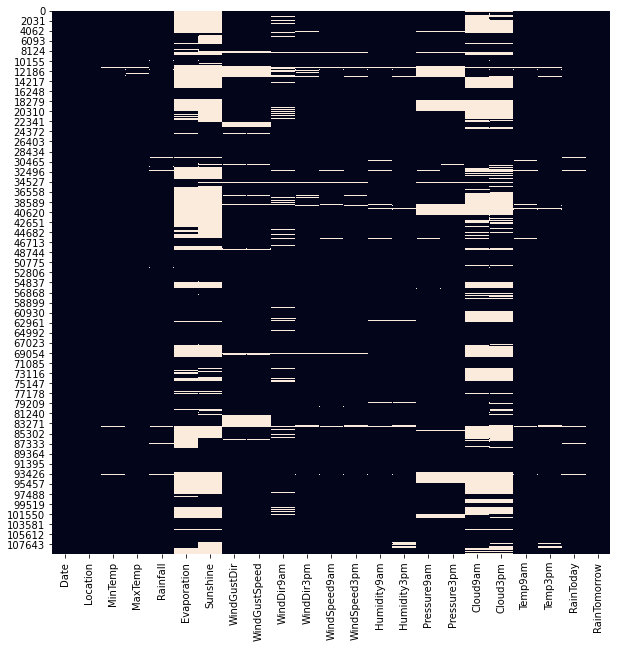

In [93]:
plt.figure(figsize=(10,10))
sns.heatmap(df.isnull(),cbar=False)

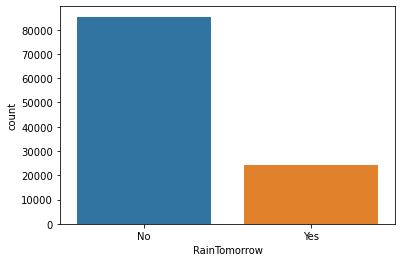

In [94]:
sns.countplot(df['RainTomorrow'])

In [5]:
# categorical and numerical varialbes

num_columns = [ col for col in df.columns if df[col].dtype=="float64"]
cat_columns = [col for col in df.columns if df[col].dtype=="O"]

num_variables = df[num_columns]
cat_variables = df[cat_columns]

In [6]:
print ('numericalcolumns:', num_columns) 
print ('\n categorical columns:', cat_columns)

numericalcolumns: ['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm']

 categorical columns: ['Date', 'Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday', 'RainTomorrow']


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15]),
 <a list of 16 Text major ticklabel objects>)

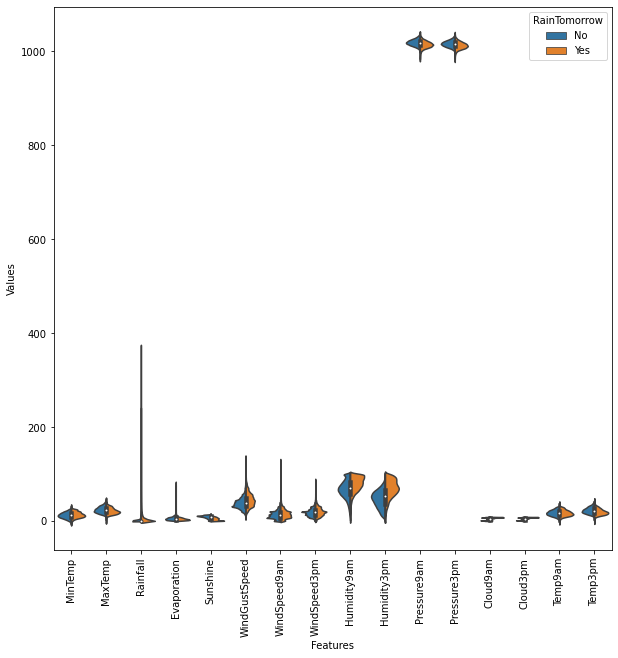

In [97]:
# violine plot to see the outliers
violine_plot = pd.concat([df['RainTomorrow'],num_variables], axis=1) 
violine_plot = pd.melt(violine_plot, id_vars="RainTomorrow", var_name="Features", value_name='Values')
plt.figure(figsize=(10,10))
# Setting the violinplot objetc with respecitve atributes
sns.violinplot(x="Features", y="Values", hue="RainTomorrow", data=violine_plot, split = True)
# Rotation of x ticks
plt.xticks(rotation=90)

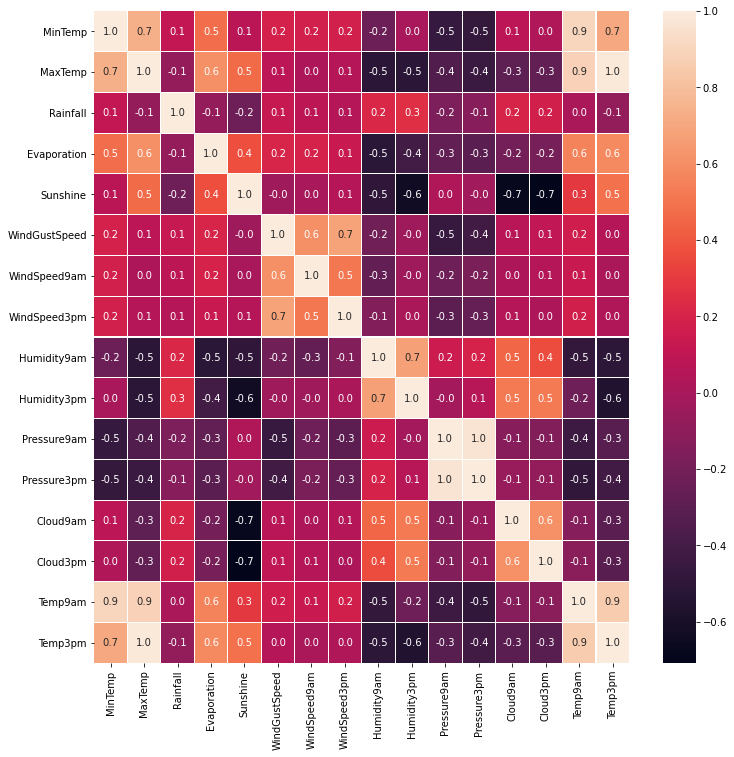

In [98]:
matrix_corr = df.corr()
fig = plt.figure(figsize=(12,12))
sns.heatmap(matrix_corr,annot=True, fmt=".1f",linewidths="0.1")

#### observations from the matrix
* Pressure9am and Pressure3pm have very strong correlation(almost 1)
* MinTemp, MaxTemp, Temp9am, Temp3pm have strong correlation between them.
* WindGustSpeed, WindSpeed9am, WindSpeed3pm have moderate correlation between them. 
* Humidity9am, Humidity3pm have moderate correlation between them.
* Cloud9am, Cloud3pm have moderate correlation between them.

## Handling Missing Values and Variables Encoding

In [7]:
# handing missing values on numerical variables

from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy = "median")
a = imputer.fit_transform(num_variables)
num_var = pd.DataFrame(a, columns = num_columns, index = df.index)

In [8]:
# handling missing values on categorical variables
cat_var= cat_variables.fillna(cat_variables.mode().iloc[0])

In [9]:
# Convert categorical features to continuous features with Label Encoding
from sklearn.preprocessing import LabelEncoder
lencoders = {}
for col in cat_var.loc[:, cat_var.columns != 'Date'].select_dtypes(include=['object']).columns:
    lencoders[col] = LabelEncoder()
    cat_var[col] = lencoders[col].fit_transform(cat_var[col])

In [10]:
# formating the Date column
cat_var["Date"] = pd.to_datetime(cat_var["Date"])
cat_var["Day"] = cat_var['Date'].dt.day
cat_var["Month"] = cat_var['Date'].dt.month
cat_var["Year"] = cat_var['Date'].dt.year
cat_var = cat_var.drop('Date', axis = 1)

In [11]:
cat_var.head()

,Location,WindGustDir,WindDir9am,WindDir3pm,RainToday,RainTomorrow,Day,Month,Year
0,2,13,13,14,0,0,1,12,2008
1,2,14,6,15,0,0,2,12,2008
2,2,15,13,15,0,0,3,12,2008
3,2,4,9,0,0,0,4,12,2008
4,2,13,1,7,0,0,5,12,2008


In [12]:
# numeric variables feature scalling
from sklearn.preprocessing import MinMaxScaler,PolynomialFeatures

scaler = MinMaxScaler()
scalled = scaler.fit_transform(num_var)
num_var = pd.DataFrame(scalled, columns = num_columns, index = df.index)


In [13]:
df_prepared = pd.concat([num_var,cat_var], axis=1)

In [14]:
df_prepared.head()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,...,Temp3pm,Location,WindGustDir,WindDir9am,WindDir3pm,RainToday,RainTomorrow,Day,Month,Year
0,0.516509,0.517241,0.001617,0.058252,0.586207,0.294574,0.153846,0.275862,0.71,0.22,...,0.519305,2,13,13,14,0,0,1,12,2008
1,0.375000,0.559387,0.000000,0.058252,0.586207,0.294574,0.030769,0.252874,0.44,0.25,...,0.567568,2,14,6,15,0,0,2,12,2008
2,0.504717,0.570881,0.000000,0.058252,0.586207,0.310078,0.146154,0.298851,0.38,0.30,...,0.546332,2,15,13,15,0,0,3,12,2008
3,0.417453,0.614943,0.000000,0.058252,0.586207,0.139535,0.084615,0.103448,0.45,0.16,...,0.610039,2,4,9,0,0,0,4,12,2008
4,0.613208,0.697318,0.002695,0.058252,0.586207,0.271318,0.053846,0.229885,0.82,0.33,...,0.671815,2,13,1,7,0,0,5,12,2008


In [15]:
X_train = df_prepared.drop(["RainTomorrow"], axis = 1)
y_train = df_prepared['RainTomorrow']


## Preparing the 'Safe' data

In [16]:
safe_df = pd.read_csv("../safe_data/safe_data.csv")
safe_df = safe_df.drop("RISK_MM", axis = 1)

In [17]:
# categorical and numerical varialbes

safe_num_columns = [ col for col in safe_df.columns if df[col].dtype=="float64"]
safe_cat_columns = [col for col in safe_df.columns if df[col].dtype=="O"]

safe_num_variables = df[safe_num_columns]
safe_cat_variables = df[safe_cat_columns]

In [18]:
from sklearn.impute import SimpleImputer
safe_imputer = SimpleImputer(strategy = "median")
b = safe_imputer.fit_transform(safe_num_variables)
safe_num_var = pd.DataFrame(b, columns = safe_num_columns, index = safe_num_variables.index)

In [19]:
# numeric variables feature scalling
from sklearn.preprocessing import MinMaxScaler,PolynomialFeatures

scaler = MinMaxScaler()
safe_scalled = scaler.fit_transform(safe_num_var)
safe_num_var = pd.DataFrame(scalled, columns = safe_num_columns, index = safe_num_variables.index)

In [20]:
safe_cat_var= safe_cat_variables.fillna(safe_cat_variables.mode().iloc[0])

In [21]:
from sklearn.preprocessing import LabelEncoder
lencoders = {}
for col in safe_cat_var.loc[:, safe_cat_var.columns != 'Date'].select_dtypes(include=['object']).columns:
    lencoders[col] = LabelEncoder()
    safe_cat_var[col] = lencoders[col].fit_transform(safe_cat_var[col])

In [22]:
# formating the Date column
safe_cat_var["Date"] = pd.to_datetime(safe_cat_var["Date"])
safe_cat_var["Day"] = safe_cat_var['Date'].dt.day
safe_cat_var["Month"] = safe_cat_var['Date'].dt.month
safe_cat_var["Year"] = safe_cat_var['Date'].dt.year
safe_cat_var = safe_cat_var.drop('Date', axis = 1)

In [23]:
safe_df_prepared = pd.concat([safe_num_var, safe_cat_var], axis = 1)

In [24]:
X_test = safe_df_prepared.drop("RainTomorrow", axis = 1)
y_test = safe_df_prepared["RainTomorrow"]

## Training Models

### Logistic Regression

In [36]:
from time import time
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, auc, roc_curve,recall_score

logistic_regression = LogisticRegression(random_state = 0)
start = time()
log_fit = logistic_regression.fit(X_train,y_train)
end = time()
duration_log_fit = end - start
training_score = logistic_regression.score(X_train, y_train)
test_score = logistic_regression.score(X_test, y_test)
logistic_pred = logistic_regression.predict(X_test)
logistic_f1 = f1_score(y_test, logistic_pred)
logistic_cm = confusion_matrix(y_test, logistic_pred)
logistic_recall = recall_score(y_test, logistic_pred)
fpr, tpr, thresholds = roc_curve(y_test, logistic_pred)
logistic_auc = auc(fpr, tpr)

In [37]:
print("Logistic regression accuracy on training data is: ", training_score)
print("Logistic regression accuracy on test data is: ", test_score)
print("Logistic regression f1 score on test data is: ", logistic_f1)
print("Logistic regression recall score on test data is: ", logistic_recall)
print("Logistic regression confusion matrix score on test data is: \n ", logistic_cm)
print("Logistic regression auc score on test data is: ", logistic_auc)
print("Duration for logistic regression is: ", duration_log_fit)


Logistic regression accuracy on training data is:  0.8107915834405013
Logistic regression accuracy on test data is:  0.8107915834405013
Logistic regression f1 score on test data is:  0.4717476000101856
Logistic regression recall score on test data is:  0.3811149969142152
Logistic regression confusion matrix score on test data is: 
  [[79633  5703]
 [15042  9263]]
Logistic regression auc score on test data is:  0.657142527049964
Duration for logistic regression is:  0.7567019462585449


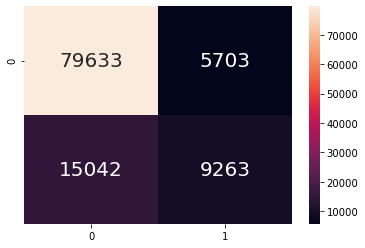

In [27]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test,logistic_pred)
sns.heatmap(cm,annot=True,fmt='d',annot_kws={'size':20},yticklabels=3)

In [30]:
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier(random_state = 42)
start = time()
tree_fit = tree.fit(X_train,y_train)
end = time()
tree_duration = end - start
tree_training_score = tree.score(X_train, y_train)
tree_test_score = tree.score(X_test, y_test)
tree_pred = tree.predict(X_test)
tree_f1 = f1_score(y_test, tree_pred)
tree_cm = confusion_matrix(y_test, tree_pred)
fpr, tpr, thresholds = roc_curve(y_test, tree_pred)
tree_auc = auc(fpr, tpr)

In [31]:
print("Decision Tree accuracy on training data is: ", tree_training_score)
print("Decision Tree accuracy on test data is: ", tree_test_score)
print("Decision Tree f1 score on test data is: ", tree_f1)
print("Decision Tree confusion matrix score on test data is: \n ", tree_cm)
print("Decision Tree auc score on test data is: ", tree_auc)
print("Duration for Decision Tree is: ", tree_duration)

Decision Tree accuracy on training data is:  1.0
Decision Tree accuracy on test data is:  1.0
Decision Tree f1 score on test data is:  1.0
Decision Tree confusion matrix score on test data is: 
  [[85336     0]
 [    0 24305]]
Decision Tree auc score on test data is:  1.0
Duration for Decision Tree is:  1.5805041790008545


In [28]:
from sklearn.ensemble import RandomForestClassifier
from time import time
random_forest = RandomForestClassifier(random_state = 42)
start = time()
random_forest_fit = random_forest.fit(X_train,y_train)
end = time()
random_forest_duration = end - start
random_forest_training_score = random_forest.score(X_train, y_train)
random_forest_test_score = random_forest.score(X_test, y_test)
random_forest_pred = random_forest.predict(X_test)
random_forest_f1 = f1_score(y_test, random_forest_pred)
random_forest_cm = confusion_matrix(y_test, random_forest_pred)
fpr, tpr, thresholds = roc_curve(y_test, random_forest_pred)
random_forest_auc = auc(fpr, tpr)

In [29]:
print("Decision Tree accuracy on training data is: ", random_forest_training_score)
print("Decision Tree accuracy on test data is: ", random_forest_test_score)
print("Decision Tree f1 score on test data is: ", random_forest_f1)
print("Decision Tree confusion matrix score on test data is: \n ", random_forest_cm)
print("Decision Tree auc score on test data is: ", random_forest_auc)
print("Duration for Decision Tree is: ", random_forest_duration)

Decision Tree accuracy on training data is:  0.9999817586486807
Decision Tree accuracy on test data is:  0.9999817586486807
Decision Tree f1 score on test data is:  0.9999588545095457
Decision Tree confusion matrix score on test data is: 
  [[85336     0]
 [    2 24303]]
Decision Tree auc score on test data is:  0.9999588562024275
Duration for Decision Tree is:  18.04654598236084


In [218]:
from sklearn.metrics import make_scorer
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import fbeta_score, make_scorer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

random_forest_grid = RandomForestClassifier(random_state=42)

param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [4, 5, 6, 7, 8],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [50, 100, 200]}

CV_rfc = GridSearchCV(estimator=random_forest_grid, param_grid=param_grid, cv= 5)
CV_rfc.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [4, 5, 6, 7, 8],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [50, 100, 200]})

In [219]:
CV_rfc.best_params_

{'criterion': 'gini',
 'max_depth': 8,
 'max_features': 'auto',
 'n_estimators': 200}

In [34]:
# training the models

from sklearn.metrics import accuracy_score, f1_score
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.svm import SVC
import time
import warnings
warnings.filterwarnings("ignore")


clf_a = DecisionTreeClassifier(random_state = 0)
clf_b = RandomForestClassifier(random_state = 0)
clf_c = LogisticRegression(random_state = 0)
clf_d = SGDClassifier(random_state = 0)
clf_e = SVC(kernel = 'poly')

list_clf = [clf_a, clf_b, clf_c, clf_d, clf_e]

results = []
for clf in list_clf:
    clf_name = clf.__class__.__name__
    scores_f1 = cross_val_score(clf, X_train, y_train, cv=5, scoring = 'f1')
    scores_auc = cross_val_score(clf, X_train, y_train, cv=5, scoring = 'roc_auc')
    train_scores_ = cross_val_score(clf, X_train, y_train, cv=5)
    test_scores_ = cross_val_score(clf, X_test, y_test, cv=5)
    results.append([clf_name, np.mean(scores_f1), np.mean(train_scores_), np.mean(test_scores_), np.mean(scores_auc)])

df_results = pd.DataFrame(np.array(results), columns = ['Algorithm', 'F1-Score', 'Training Accuracy', 'Testing Accuracy', 'AUC'])


In [35]:
df_results.sort_values(by=['F1-Score'], ascending=False)



,Algorithm,F1-Score,Training Accuracy,Testing Accuracy,AUC
1,RandomForestClassifier,0.57608772559316,0.8441458765577059,0.8441458765577059,0.8590522882116727
0,DecisionTreeClassifier,0.4847839931962148,0.753677806567176,0.753677806567176,0.6711226881265961
2,LogisticRegression,0.4500836863891967,0.8063954000730259,0.8063954000730259,0.8021766189792411
3,SGDClassifier,0.06822101564995209,0.7850257357710215,0.7850257357710215,0.7851649833281609
4,SVC,0.0,0.7783219780183765,0.7783219780183765,0.8351450831532465


## PCA

In [78]:
from sklearn.decomposition import PCA

clf_pca = RandomForestClassifier(random_state=0)

list_n = [5,10,20]

results_pca = []
for i in list_n:
    pca = PCA(n_components = i)
    X_pca = pca.fit_transform(X)
    scores_f1 = cross_val_score(clf_pca, X_pca, y, cv=5, scoring = 'f1')
    scores_ = cross_val_score(clf_pca, X_pca, y, cv=5)
    explained_variance = np.sum(pca.explained_variance_ratio_)
    results_pca.append([i, explained_variance, np.mean(scores_f1), np.mean(scores_)])

df_results_pca = pd.DataFrame(np.array(results_pca))
df_results_pca.columns = ['Number of components', 'Cumulative Explained Variance Ration','F1-Score', 'Accuracy']
df_results_pca.sort_values(by=['F1-Score'], ascending=False)

,Number of components,Cumulative Explained Variance Ration,F1-Score,Accuracy
2,20.0,0.999995,0.561325,0.840188
1,10.0,0.999622,0.462103,0.812315
0,5.0,0.958172,0.102958,0.727921


## Feature Importance 

In [79]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)

RandomForestClassifier()

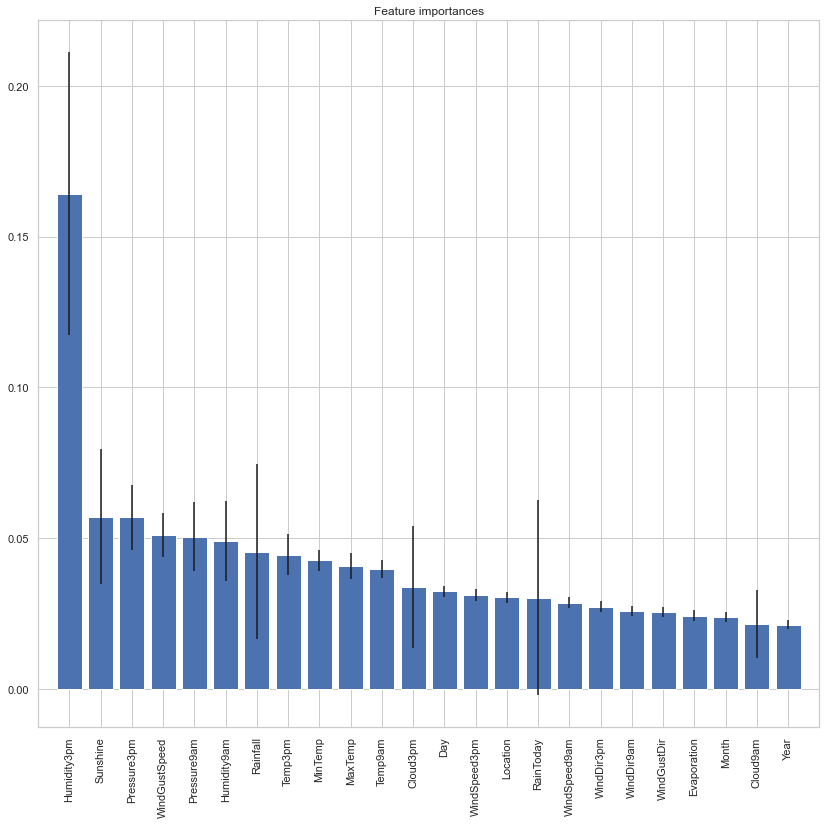

In [80]:
importances = rfc.feature_importances_
indices = np.argsort(importances)[::-1]
std = np.std([tree.feature_importances_ for tree in rfc.estimators_],axis=0)
# Plot the feature importances of the forest

plt.figure(1, figsize=(14, 13))
plt.title("Feature importances")
plt.bar(range(X_train.shape[1]), importances[indices], yerr=std[indices], align="center")
plt.xticks(range(X_train.shape[1]), X_train.columns[indices],rotation=90)
plt.xlim([-1, X_train.shape[1]])
plt.show()

## Parameter Tuning

In [81]:
from sklearn.metrics import make_scorer
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import fbeta_score, make_scorer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

clf_grid = RandomForestClassifier(random_state=42)

param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [4, 5, 6, 7, 8],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [50, 100, 200]})

CV_rfc = GridSearchCV(estimator=clf_grid, param_grid=param_grid, cv= 5)
CV_rfc.fit(X_train, y_train)


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [4, 5, 6, 7, 8],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [50, 100, 200]})

In [82]:
CV_rfc.best_params_

{'criterion': 'gini',
 'max_depth': 8,
 'max_features': 'auto',
 'n_estimators': 200}

In [253]:
rfc1=RandomForestClassifier(random_state=42, max_features='auto', n_estimators= 200, max_depth=8, criterion='gini')
rfc1.fit(X_train, y_train)

RandomForestClassifier(max_depth=8, n_estimators=200, random_state=42)

In [254]:
cv_pred = rfc1.predict(X_test)

In [256]:
print("Accuracy for Random Forest on CV data: ",accuracy_score(y_train,cv_pred))

Accuracy for Random Forest on CV data:  0.2858966992274788


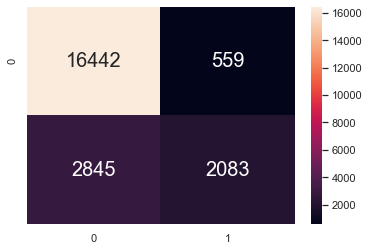

In [90]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test,cv_pred)
sns.heatmap(cm,annot=True,fmt='d',annot_kws={'size':20},yticklabels=3)